# Module 2 - Composite plots

* [PairGrid/PairPlots](#PairPlots)
* [FacetGrid](#FacetGrid)
* [Jointplots](#Jointplot)
* [JointGrid](#JointGrid)


There is many plots we can do as describe [here](https://seaborn.pydata.org/examples/index.html)


| Function  | Description |
| ------------- | ------------- |
| FacetGrid | This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.   |
| PairGrid | Subplot grid for plotting pairwise relationships in a dataset.|
| jointplot | Draw a plot of two variables with bivariate and univariate graphs.|
| JointGrid (joinplot for expert) | Grid for drawing a bivariate plot with marginal univariate plots.|

<u> Note :<u> If you need more flexibility, you should use JointGrid directly in replacement of joinplot.  


Import the libraries.
Load the dataset.
___

___

# PairPlots

Usefull to describe a few set of variables and find some potential patterns/correlations.  
You will use pairplot and PairGrid.
___


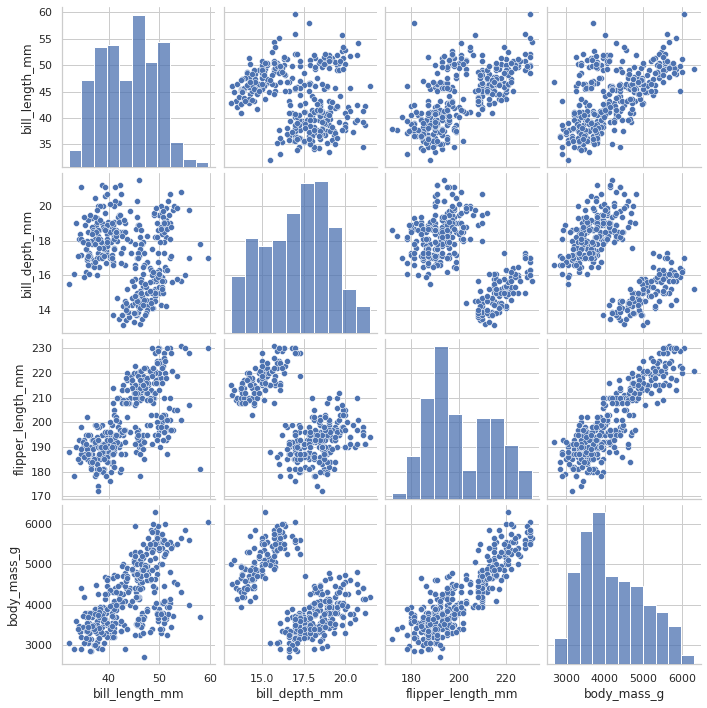

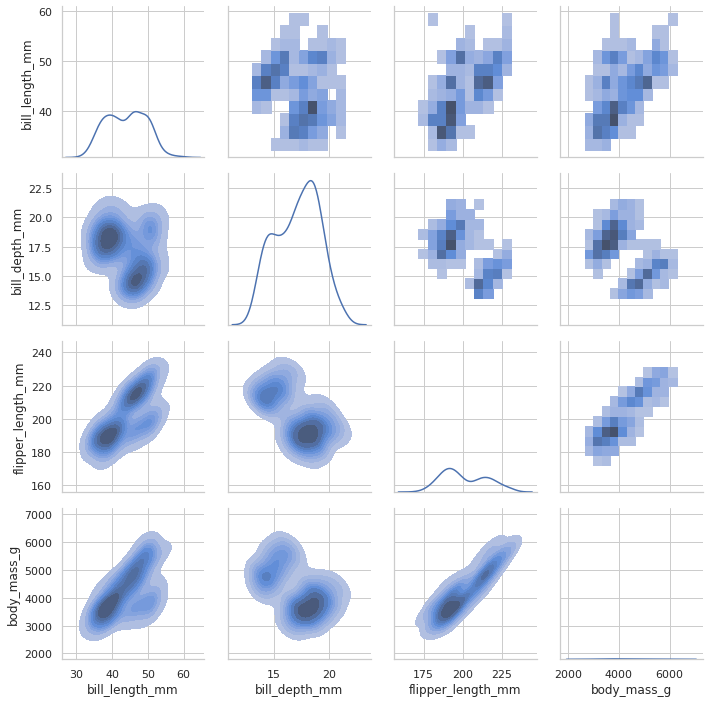

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#print(sns.get_dataset_names())

sns.set_theme(style="whitegrid")

# Load the dataset
penguins = sns.load_dataset("penguins")

penguins.head()
sns.pairplot(penguins)
plt.show()

g = sns.PairGrid(penguins) # corner=True to see just a part remove redondant part
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.kdeplot)
plt.show()


In [ ]:
___

# Facetgrid
___

Use map and map_dataframe.  
map_dataframe is like .map but passes args as strings and inserts data in kwargs.

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
scatterplot via map_dataframe using FaceGrid


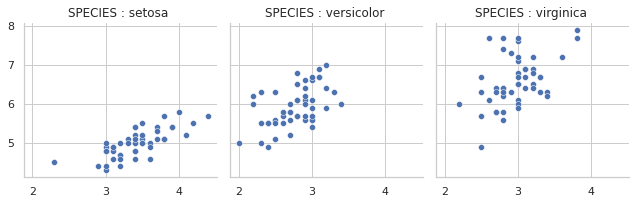

Histplot via map using FaceGrid


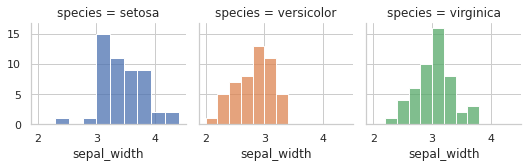

In [2]:
# Load the dataset
dataframe = sns.load_dataset("iris")
print(dataframe.head())

print("scatterplot via map_dataframe using FaceGrid")
f = sns.FacetGrid(dataframe,col="species")
f.map_dataframe(sns.scatterplot,x="sepal_width",y="sepal_length")
f.set_titles(col_template='SPECIES : {col_name} ')
plt.show()

print("Histplot via map using FaceGrid")
g = sns.FacetGrid(dataframe, col="species",hue="species", height=2.5, col_wrap=3)
g.map(sns.histplot, "sepal_width")
plt.show()

# You could have imagine to do it like this.
# doesn't work because no property 'col'
#sns.scatterplot(x="sepal_width", y="sepal_length" ,hue="species",col="species",alpha=0.3,data=dataframe)
#plt.show()

___

# jointplot
___

This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


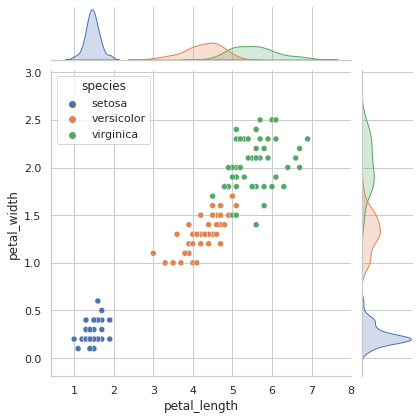

In [16]:
# Load the dataset
dataframe = sns.load_dataset("iris")
print(dataframe.head())

g = sns.JointGrid()
ns.jointplot(x="petal_length",y= "petal_width" ,hue='species',kind= 'scatter',data=dataframe)

plt.show()

___

# JointGrid
___

Grid for drawing a bivariate plot with marginal univariate plots.

JointDistribution plot in the main plot in the center.
Two marginal areas can be customised separately with jointGrid (not jointplot)

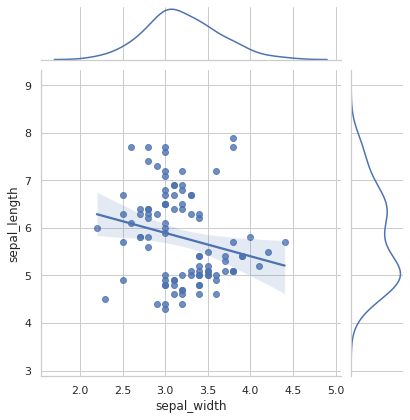

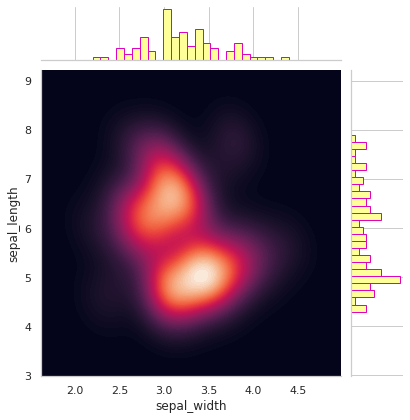

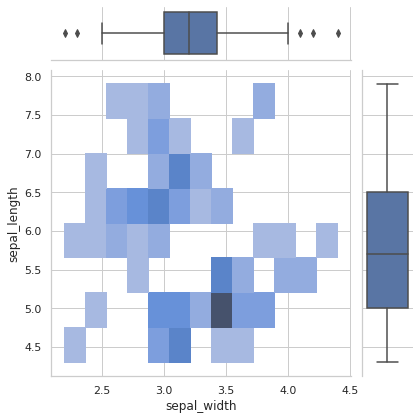

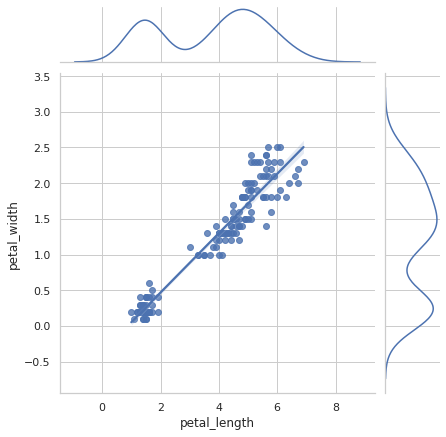

In [6]:

dataframe = sns.load_dataset("iris")

# Panda style I dont't remember why I filter

both = dataframe.loc[dataframe.species.isin (["setosa" , "virginica"])]

g = sns.JointGrid(data=both, x="sepal_width", y="sepal_length")
# You define the two plots you want
g.plot(sns.regplot,sns.kdeplot)
plt.show()

g = sns.JointGrid(data=both, x="sepal_width", y="sepal_length")
# You define the plot you want in the center
g.plot_joint(sns.kdeplot,fill=True,thresh=0, levels=100 ,cmap="rocket" )
# You define the marginals plot
g.plot_marginals(sns.histplot, color="#feff99", edgecolor='#e002c2', linewidth=1, alpha=1, bins=25)
plt.show()

g = sns.JointGrid(data=both, x="sepal_width", y="sepal_length")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

# But you can plot two different plots on the marginal axes.
g = sns.JointGrid()
x,y = dataframe.petal_length ,dataframe.petal_width
sns.regplot(x=x,y=y, ax= g.ax_joint)
# You define the marginals plot separetely
sns.kdeplot(x=x, ax= g.ax_marg_x)
sns.kdeplot(y=y,ax = g.ax_marg_y)
plt.show()


